# Data gathering for target variable(s)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.style.use('wright')

#### Mortality information from the Social Security Administration
---
Tables split by male and female mortality  
Rows are attained ages (0 through 120).   
Columns are the year for which the mortality rate is observed.

---

In [2]:
male = pd.read_csv('../data/DeathProbsE_M_Hist_TR2018.csv', skiprows = 1, index_col=0).T
female = pd.read_csv('../data/DeathProbsE_F_Hist_TR2018.csv', skiprows = 1, index_col=0).T

In [3]:
female.head()

Year,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0.119694,0.104258,0.102616,0.098039,0.102720,0.103581,0.106581,0.102300,0.098422,0.093674,...,0.006055,0.006096,0.005952,0.005728,0.005562,0.005513,0.005435,0.005377,0.005313,0.005374
1,0.036172,0.030606,0.030162,0.028194,0.028747,0.026746,0.028641,0.026533,0.025141,0.024274,...,0.000433,0.000434,0.000416,0.000373,0.000396,0.000382,0.000377,0.000379,0.000346,0.000353
2,0.017817,0.015101,0.014885,0.013924,0.014194,0.013218,0.014142,0.013114,0.012435,0.012012,...,0.000276,0.000256,0.000241,0.000241,0.000214,0.000218,0.000233,0.000221,0.000221,0.000231
3,0.012922,0.010958,0.010802,0.010107,0.010302,0.009596,0.010265,0.009521,0.009030,0.008724,...,0.000184,0.000192,0.000188,0.000186,0.000162,0.000166,0.000177,0.000162,0.000162,0.000165
4,0.010310,0.008746,0.008622,0.008069,0.008224,0.007662,0.008194,0.007602,0.007211,0.006967,...,0.000160,0.000148,0.000153,0.000150,0.000132,0.000143,0.000134,0.000133,0.000131,0.000129


In [4]:
def plot_age(df, age, label_text = None, show = True, title_in = None, leg_loc=(1,.1)):
    plt.plot(df.iloc[age,:], label = label_text + ' '+ str(age))
    if show:
        plt.legend(loc=leg_loc)
        plt.title(title_in)
        plt.show();
    pass

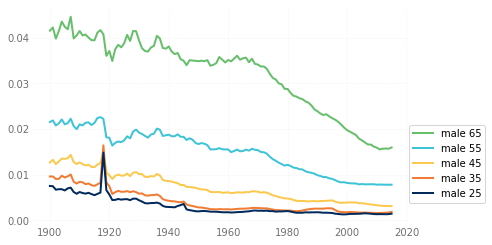

In [5]:
# you can see Spanish flu and world wars
#plot_age(male,20, show = False)
plot_age(male, 65, 'male', show=False)
plot_age(male, 55, 'male', show=False)
plot_age(male, 45, 'male', show=False)
plot_age(male, 35, 'male', show=False)
plot_age(male, 25, 'male')

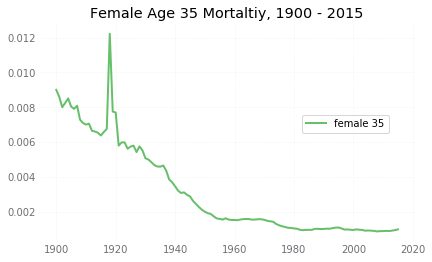

In [6]:
plot_age(female, 35, 'female', title_in = "Female Age 35 Mortaltiy, 1900 - 2015", leg_loc=(.7,.5))

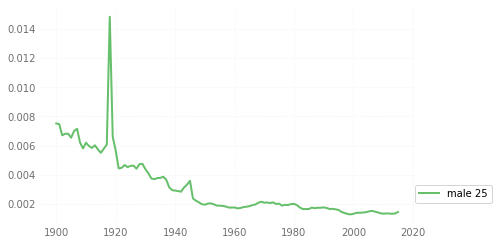

In [7]:
plot_age(male, 25, 'male')

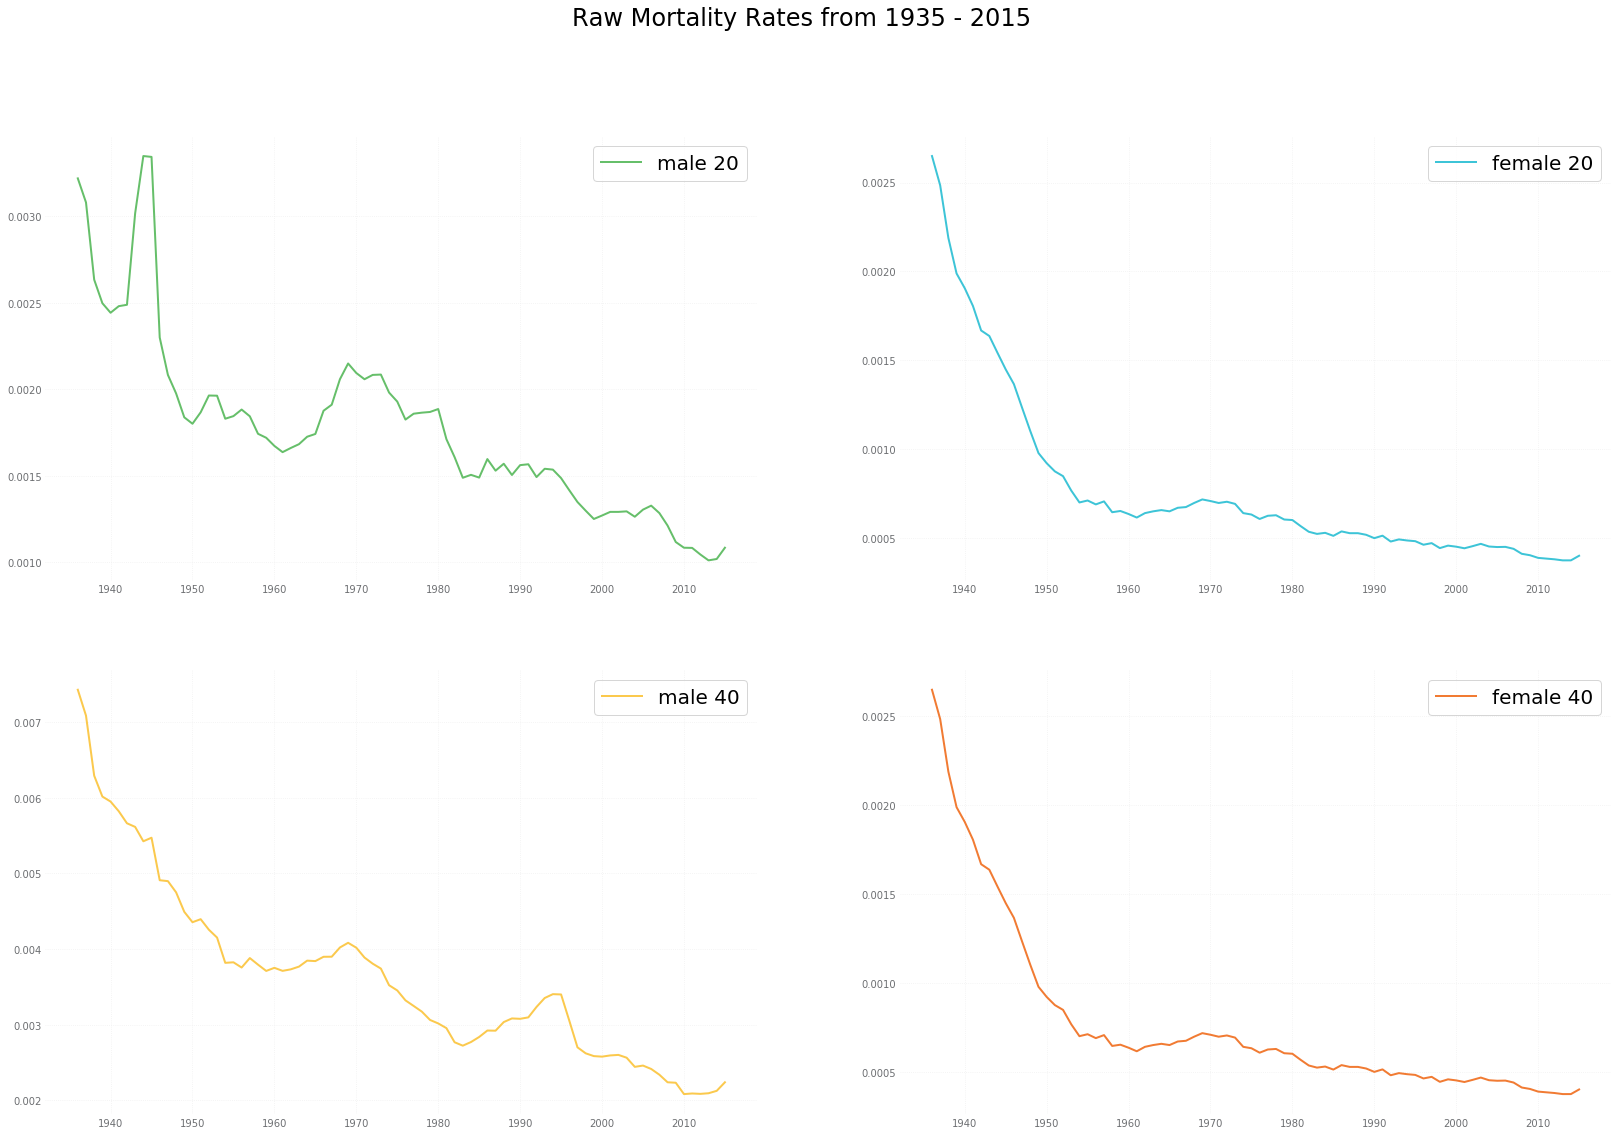

In [8]:
plt.figure(figsize=(25,18))
plt.suptitle("Raw Mortality Rates from 1935 - 2015", fontsize = 24)
ax =plt.subplot(221)
ax = plt.plot(male.iloc[20,-80:], label = 'male 20', c = '#66BF6A')
plt.legend(fontsize=20)
ax2 = plt.subplot(222)
ax2 = plt.plot(female.iloc[20,-80:], label = 'female 20', c =  '#3DC4D7')
plt.legend(fontsize=20)
ax3 = plt.subplot(223)
ax3 = plt.plot(male.iloc[40,-80:], label = 'male 40', c = '#FBC94D')
plt.legend(fontsize=20)
ax4 = plt.subplot(224)
ax4 = plt.plot(female.iloc[20,-80:], label = 'female 40', c='#F17B33')
plt.legend(fontsize=20);

### Mortality facts:
---

> 1/3 of the world population infect with Spanish Flu in 1918, 3% of population died.  675k in US  
> WW I -- US deaths around 100k (combat & disease)  
> WWII -- US deaths around 400k  
> Vietnam & Korean Wars -- US deaths around 100k  

---

# Compute rate of change in mortality 

---
> Plot of how a mortality rate changes over time.  Expecting to see "negative improvement" in recent years, particularly for males  

---


In [9]:
def return_improvements(qx_in):
    qx_vector = np.array(qx_in)
    j = len(qx_vector)
    if j <= 1:
        print("Mortality info passed to function not large enough to compute qx improvement.")
        pass
    improve = []
    for i in range(j-1):
        improve.append(1-qx_vector[i+1]/qx_vector[i])
    return(improve)

In [10]:
def plot_rate_of_change(qx_vector, title_in=None):
    qx_improve = return_improvements(qx_vector)
    plt.axhline(y=0,c ='grey', alpha = .2)
    qxi = pd.DataFrame({'improvement':qx_improve})
    qxi['improvement'].plot(kind='line')
    plt.xticks([])
    plt.title(title_in)
    plt.show();
#    print(qxi)
    return
    
    

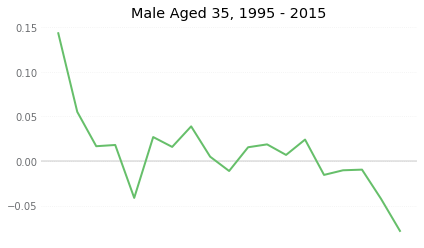

In [11]:
plot_rate_of_change(male.iloc[35,-20:], title_in="Male Aged 35, 1995 - 2015")

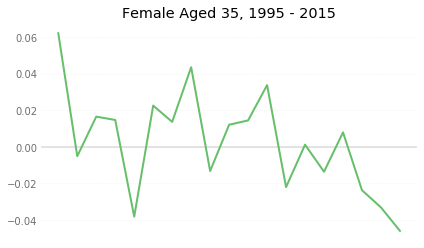

In [12]:
plot_rate_of_change(female.iloc[35,-20:], title_in="Female Aged 35, 1995 - 2015")

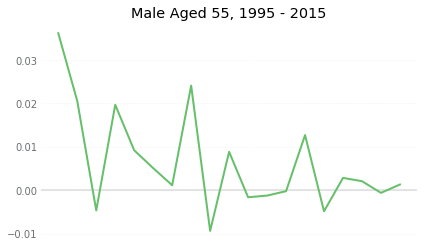

In [13]:
plot_rate_of_change(male.iloc[55,-20:], title_in="Male Aged 55, 1995 - 2015")

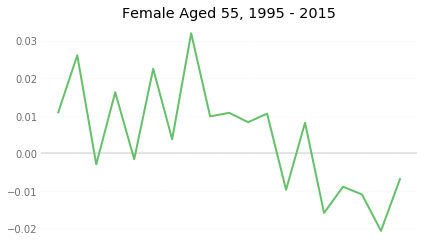

In [14]:
plot_rate_of_change(female.iloc[55,-20:], title_in="Female Aged 55, 1995 - 2015")

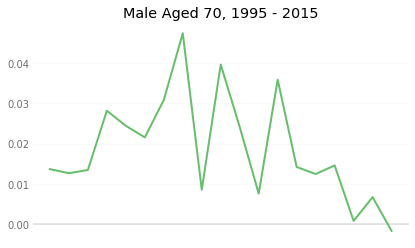

In [15]:
plot_rate_of_change(male.iloc[70,-20:], title_in="Male Aged 70, 1995 - 2015")

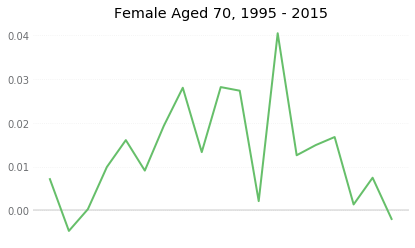

In [16]:
plot_rate_of_change(female.iloc[70,-20:], title_in="Female Aged 70, 1995 - 2015")

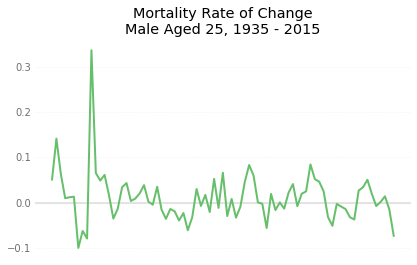

In [17]:
plot_rate_of_change(male.iloc[25,-80:], title_in="Mortality Rate of Change\nMale Aged 25, 1935 - 2015")

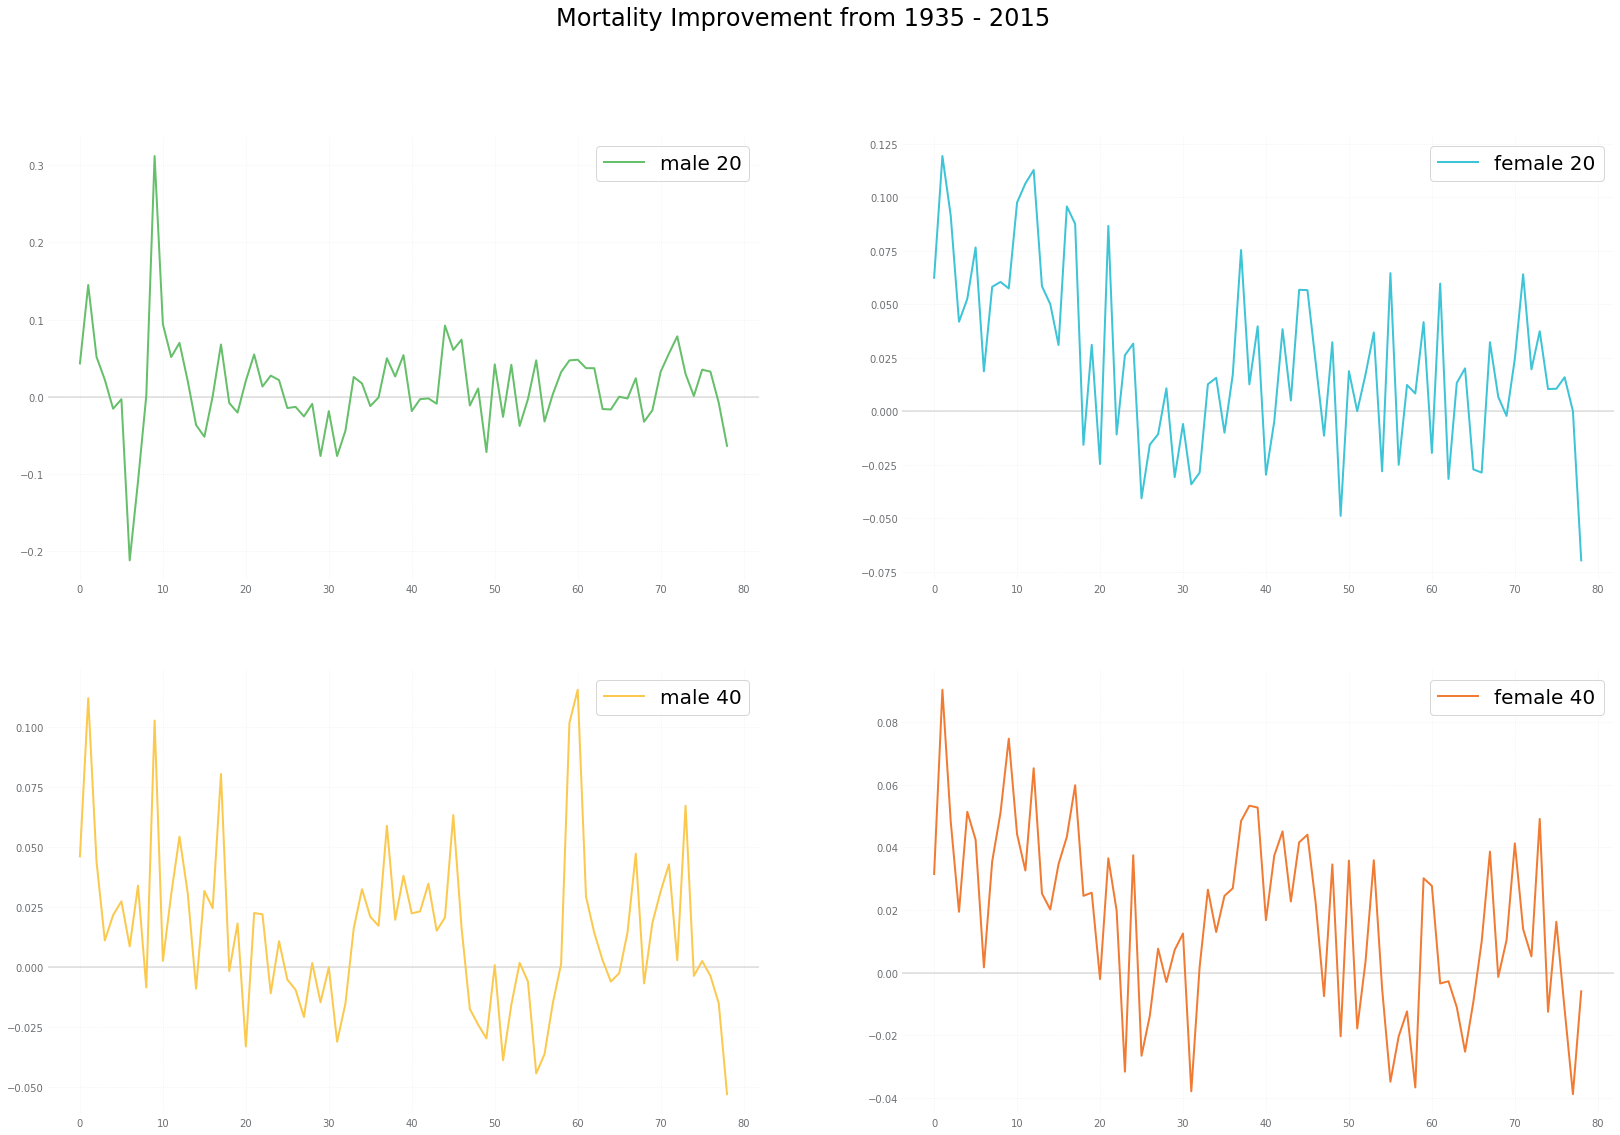

In [18]:
# Side by side mortality improvement
plt.figure(figsize=(25,18))
plt.suptitle("Mortality Improvement from 1935 - 2015", fontsize = 24)
ax =plt.subplot(221)
ax = plt.axhline(y=0,c ='grey', alpha = .2)
ax = plt.plot(return_improvements(male.iloc[20,-80:]), label = 'male 20', c = '#66BF6A')
plt.legend(fontsize=20)
ax2 = plt.subplot(222)
ax2 = plt.axhline(y=0,c ='grey', alpha = .2)
ax2 = plt.plot(return_improvements(female.iloc[20,-80:]), label = 'female 20', c =  '#3DC4D7')
plt.legend(fontsize=20)
ax3 = plt.subplot(223)
ax3 = plt.axhline(y=0,c ='grey', alpha = .2)
ax3 = plt.plot(return_improvements(male.iloc[40,-80:]), label = 'male 40', c = '#FBC94D')
plt.legend(fontsize=20)
ax4 = plt.subplot(224)
ax4 = plt.axhline(y=0,c ='grey', alpha = .2)
ax4 = plt.plot(return_improvements(female.iloc[40,-80:]), label = 'female 40', c='#F17B33')
plt.legend(fontsize=20);

# Read in population files and perform initial EDA  

> Population mortality files are coming from two sources.  The source is the US Census but file formats changed over time.  Population values were not used in the final project, but they were needed to combine ages for trend calculations

In [19]:
# Sex 0 = both
# Sex 1 = male
# Sex 2 = female

# Age 999 = total all ages

In [20]:
popltn = pd.read_csv('../data/census_population_2010_2017.csv')

cols = popltn.columns 
cols = cols.drop(['CENSUS2010POP', 'ESTIMATESBASE2010'])                       # don't need these columns
col_names = ['sex', 'age', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]     # setting standard for table


def parce_pop(df_in, sex_in, col_out = cols, colnames = col_names):
    df_out = df_in[cols]
    df_out = df_out.rename(dict(zip(cols,col_names)), axis = 1)       # using zip to rename col names
    df_out = df_out[df_out['sex'] == sex_in].copy()                   # creating a separate df for m/f/total
    df_out = df_out[df_out['age'] != 999].copy()                      # deleting total row
    df_out.drop('sex', axis = 1, inplace = True)                      # don't need sex column
    df_out.set_index('age', inplace = True)                           # index is 0 to 120
    return(df_out)


male_pop = parce_pop(popltn, 1)
female_pop = parce_pop(popltn, 2)
tot_pop = parce_pop(popltn, 0)

In [21]:
male_pop.head()

,2010,2011,2012,2013,2014,2015,2016,2017
age,,,,,,,,
0,2018489,2028365,2007687,2009717,2024473,2037837,2021764,2015150
1,2020238,2025239,2035061,2015564,2018408,2033678,2047678,2031718
2,2088564,2026382,2031249,2041998,2023505,2026909,2042666,2056625
3,2101148,2093834,2031539,2036967,2048966,2030982,2034744,2050474
4,2084202,2105860,2098540,2036784,2043405,2055928,2038254,2042001


In [22]:
female_pop.head()

,2010,2011,2012,2013,2014,2015,2016,2017
age,,,,,,,,
0,1932965,1934606,1918799,1921491,1930252,1946457,1933613,1924145
1,1937457,1940817,1942203,1926877,1930281,1939511,1956339,1943534
2,2002052,1944109,1947399,1949297,1934791,1938627,1948325,1965150
3,2010534,2007809,1949782,1953732,1956458,1942394,1946582,1956281
4,1993124,2015625,2012904,1955514,1960279,1963407,1949612,1953782


#### The 1900 - 1979 census values were stored in a separate format.  The section reads those values in.

In [23]:
years = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970]
popx = pd.read_csv('../data/pop'+str(years[0])+'.csv', engine='python', usecols = range(4), header=None, skiprows=8, skipfooter=15)

In [24]:
years = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970]
for year in years:
    popx = pd.read_csv('../data/pop'+str(year)+'.csv', engine='python', usecols = range(4), header=None, skiprows=8, skipfooter=15)
    for cols in range(4):
        popx[cols] = popx[cols].str.replace('+','')
        popx[cols] = popx[cols].str.replace(',','').astype(int)
        tot_pop[year] = popx[1]
        male_pop[year] = popx[2]
        female_pop[year] = popx[3]

In [25]:
female_pop.tail()

,2010,2011,2012,2013,2014,2015,2016,2017,1900,1910,1920,1930,1940,1950,1960,1970
age,,,,,,,,,,,,,,,,
96,75146,77465,79975,81502,89894,90078,99304,105967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,54121,57167,59547,61267,63073,69205,70041,76874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,37534,40114,42865,44372,46459,47101,52246,53197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,26074,27035,29318,31119,32730,33989,34484,38571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,45060,47566,50673,53910,58505,61846,65535,68354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Now need to get the 1990, and 2000 population values that were stored in a different format

In [26]:
years = [1990, 2000]
for year in years:
    popx = pd.read_csv('../data/pop'+str(year)+'.csv', header=None, skiprows=3)
    tot_pop[year] = popx.iloc[0:101,2]
    male_pop[year] = popx.iloc[0:101,3]
    female_pop[year] = popx.iloc[0:101,4]

In [27]:
dfs = [tot_pop, male_pop, female_pop]
for df in dfs:
    df.fillna(0, inplace = True)

In [28]:
# Store combined population files in case every want / all in one place
tot_pop.to_csv('../data/tot_pop.csv')
male_pop.to_csv('../data/male_pop.csv')
female_pop.to_csv('../data/female_pop.csv')

#### Combine ages to determine aggregated mortality improvement
---

>In order to combine ages and determine an aggregate mortality improvement, a static population reference is required.  
>(Reference: CDC Statistical Note 6 March 1995 https://www.cdc.gov/nchs/data/statnt/statnt06rv.pdf)  
> If you do not use a static population for weights, the result would be invalid.  If just one age is being computed (ie, there is no aggregation), then no population weights are needed.

---

In [29]:
#  This function returns a list of mortality rates for the most recent 'numb_years'
#    that are a combination of 'ages'
#    the ages are combined by weighing on population values 'pop' for a given year 'pop_year'
#    'pop year' can be 1900, 1910, 1920, etc to 2000, and every year thereafter
#    a set of mortality rates by year and age


def combined_ages(table_in = male, ages = range(25,36) , numb_years = 0, pop = male_pop, pop_year=2010 ):
    if not(numb_years):
        numb_years = table_in.shape[1]               # if no years are specified, use all the years

    years = list(table_in.columns)[-numb_years:]     # get an iterable list of years to use in the calculation
    weights = pop.loc[ages,pop_year]              # load weights from population table

    weighted_qx = []
    for year in years:
        vector_mult = np.multiply(weights,                    # multiply mortality rates by population figures
                                  table_in.iloc[ages,:][year])
        weighted_rate = sum(vector_mult)/sum(weights)
        weighted_qx.append(weighted_rate)

    return(weighted_qx)   


# This function computes the percentge change in a vecotr of mortality rates

def improvement(qx_in):
    out = []
    for q in range(len(qx_in)-1):
        out.append(1-qx_in[q+1]/qx_in[q])
    return(out)



In [30]:
improvement(combined_ages(female, numb_years = 10, pop=female_pop))

[0.005394337476117839,
 0.02323755657647575,
 -0.037004491290058006,
 0.026040794652479105,
 -0.02791217183773509,
 0.0015961071599533971,
 -0.0033946244667990566,
 -0.021934388621305034,
 -0.072667490909474]

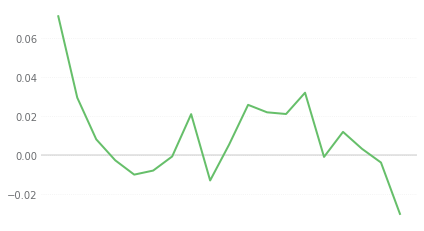

In [31]:
plot_rate_of_change(combined_ages(male, ages=range(15,55), numb_years = 20, pop=male_pop))

## Life Expectancy / Complete Expectation of Life
---
>The main target variable that I will be using is life expectancy or the 'complete expectation of life'.  
> This statistic is equal to the number of expect years a person will live plus their current age.
> At age 0, this statistic is the expected number of years of life for a new born.  Over time, this value changes, and has generally increased, but in some years, including recent years, the value has started to decline.

---

#### Creat Functions to determine CEL

In [32]:
def complete_exp_life(qx_in = male[2015], age = 0):
    cel = 0                  # complete expectation of life initialized (cel = age + el)
    el = 0                   # expectation of life initialized
    px = 1 - qx_in           # probability of surviving one year
    j = len(qx_in[age:])     # number of future years
    pxj = 1                  # probability of being alive after j durations for someone aged x
    for i in range(j):
        pxj *= px[i+age]
        el += pxj
    cel = age + el
    return(cel)

In [33]:
complete_exp_life(male[2015], 118)

118.157572795561

In [34]:
complete_exp_life(female[2015], 0)

80.47205291930985

## Target 'y' variable(s)
---

The function below creates a DataFrame that contains the complete expectation of life for a new born for each year from 1900 through 2015.  This will be the target statistic that I would like my model to analyze / predict.  After initial modeling, I came back and added a needed column, 'd1', which is the first differences.  

---

In [35]:
cel = []
cel = pd.DataFrame({'year':range(1900,2016)})

for sex in ['male', 'female']:
    if sex == 'male':
        sex_table = male
    else:
        sex_table = female
    y = []
    age = 0
    for i in range(1900,2016):
        y.append(complete_exp_life(sex_table[i],age))

    cel[sex] = y
    cel[sex+'_d1'] = cel[sex].diff()

cel.index = pd.date_range('7/1/1900', periods = len(cel), freq = 'A')
cel.dropna(inplace = True)
cel.head()

,year,male,male_d1,female,female_d1
1901-12-31,1901,47.392538,1.459793,50.381399,1.904795
1902-12-31,1902,48.542464,1.149926,51.600934,1.219535
1903-12-31,1903,48.723461,0.180998,51.639736,0.038802
1904-12-31,1904,47.605393,-1.118069,50.615941,-1.023795
1905-12-31,1905,48.254719,0.649326,51.400426,0.784485


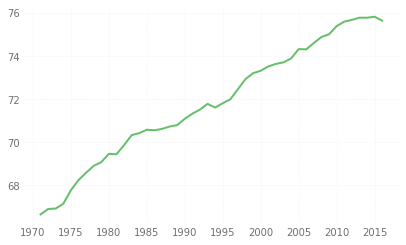

In [36]:
plt.plot(cel['male']['1970':'2015'])

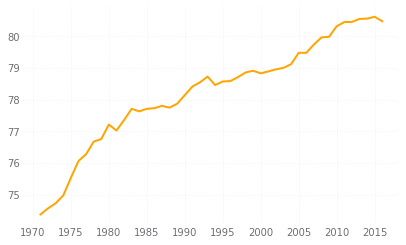

In [37]:
plt.plot(cel['female']['1970':'2015'], color = 'orange')

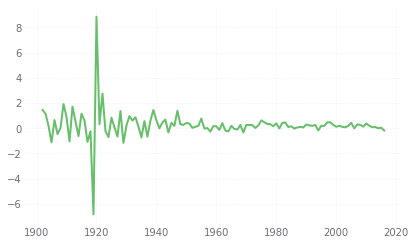

In [38]:
plt.plot(cel['male_d1'])

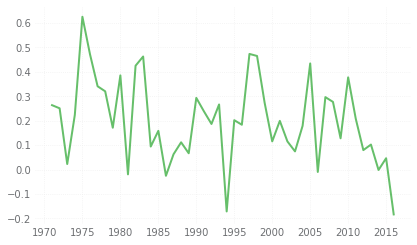

In [39]:
plt.plot(cel['male_d1']['1970':'2015'])

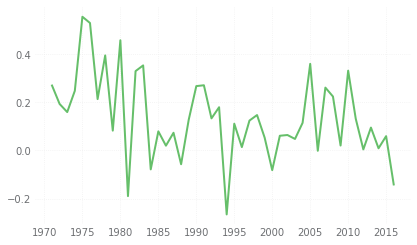

In [40]:
plt.plot(cel['female_d1']['1970':'2015'])

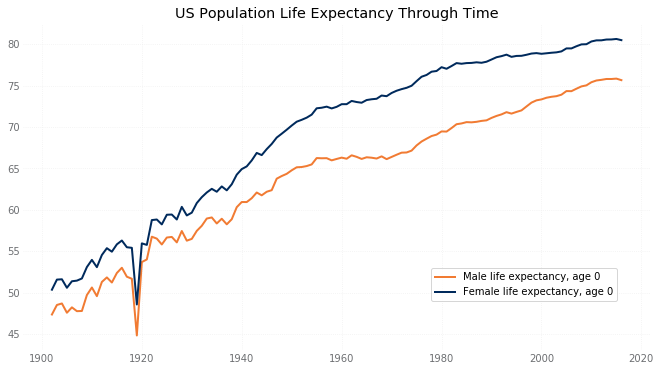

In [53]:
plt.figure(figsize=(10,6))
plt.plot(cel['male'], label = 'Male life expectancy, age 0', c='#F17B33')
plt.plot(cel['female'], label = 'Female life expectancy, age 0', c = '#002A5C' )
plt.title("US Population Life Expectancy Through Time")
plt.legend(loc = (.65,.15));

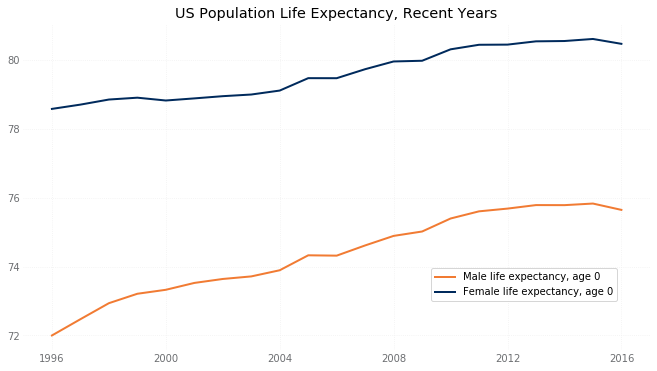

In [55]:
plt.figure(figsize=(10,6))
plt.plot(cel['male']['1995':'2015'], label = 'Male life expectancy, age 0', c='#F17B33')
plt.plot(cel['female']['1995':'2015'], label = 'Female life expectancy, age 0', c = '#002A5C' )
plt.title("US Population Life Expectancy, Recent Years")
plt.legend(loc = (.65,.15));

In [41]:
#cel.to_csv('../data/cel_targets.csv')